# Read LAS for curves only

- Read LAS with `lasio`
- Read LAS with `welly`
- Get wireline logs in `pandas`

In [1]:
fname = "../data/NAM/Well_data/Groningen_field/01_Cluster_Wells/Eemskanaal/EKL-__1.las"

There is not a lot of info in the header:

In [2]:
!head -55 ../data/NAM/Well_data/Groningen_field/01_Cluster_Wells/Eemskanaal/EKL-__1.las

Note that the location information is in the `.dev` file. It has:

- (x, y) with CRS
- KB
- Deviation survey
- Position log

In [3]:
!head -20 ../data/NAM/Well_data/Groningen_field/01_Cluster_Wells/Eemskanaal/EKL-__1.dev

## With `lasio`

In [3]:
import lasio

l = lasio.read(fname)

In [4]:
l.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr=""),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="")],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="0.0", descr=""),
  HeaderItem(mnemonic="STOP", unit="m", value="3062.9", descr=""),
  HeaderItem(mnemonic="STEP", unit="m", value="0.1", descr=""),
  HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr=""),
  HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="EKL-  1", descr="WELL"),
  HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
  HeaderItem(mnemonic="SRVC", unit="", value="", descr="SERVICE COMPANY"),
  HeaderItem(mnemonic="DATE", unit="", value="2020-12-04 16:29:54   : Log Expo...),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="UWI", unit="", value="11000074112201", descr="UNIQUE WE...),
  HeaderItem(

In [5]:
l.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(30630,)),
 CurveItem(mnemonic="DENS", unit="g/cm3", value="", descr="DENS", original_mnemonic="DENS", data.shape=(30630,)),
 CurveItem(mnemonic="DEN", unit="g/cm3", value="", descr="DEN", original_mnemonic="DEN", data.shape=(30630,)),
 CurveItem(mnemonic="FLSO", unit="_", value="", descr="FLSO", original_mnemonic="FLSO", data.shape=(30630,)),
 CurveItem(mnemonic="DT", unit="us/ft", value="", descr="DT", original_mnemonic="DT", data.shape=(30630,)),
 CurveItem(mnemonic="SON", unit="us/ft", value="", descr="SON", original_mnemonic="SON", data.shape=(30630,)),
 CurveItem(mnemonic="GENERALTIME1", unit="ms", value="", descr="General time 1", original_mnemonic="GENERALTIME1", data.shape=(30630,)),
 CurveItem(mnemonic="FLGR", unit="gAPI", value="", descr="FLGR", original_mnemonic="FLGR", data.shape=(30630,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="GR", original_mnemonic="GR", 

## With `welly`

In [6]:
from welly import Well

w = Well.from_las(fname)

/home/matt/anaconda3/envs/geocomp/lib/python3.8/site-packages/welly/well.py:173: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


In [7]:
w.header

{'name': 'EKL-  1', 'uwi': '11000074112201'}

In [8]:
w

Well(uwi: '11000074112201', 26 curves: ['DENS', 'DEN', 'FLSO', 'DT', 'SON', 'GENERALTIME1', 'FLGR', 'GR', 'CPOR_RASC', 'PORNET_NOV14', 'CALI', 'CAL', 'RES_MIC', 'RESM', 'RESD', 'RES_DEP', 'VCL_2014', 'SHNET', 'SH', 'SH_CAP', 'PERMNET_NOV14', 'PERMNET_2015', 'FACIES', 'FACIES_PP', 'FACIES_PP_ED', 'NET_NOV14'])

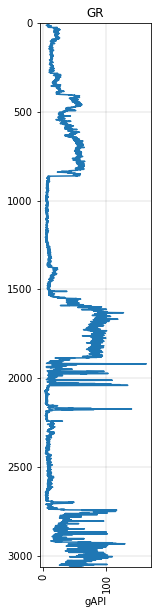

In [9]:
w.data['GR'].plot()

## To `pandas`

In [10]:
w.df()

,DENS,DEN,FLSO,DT,SON,GENERALTIME1,FLGR,GR,CPOR_RASC,PORNET_NOV14,...,VCL_2014,SHNET,SH,SH_CAP,PERMNET_NOV14,PERMNET_2015,FACIES,FACIES_PP,FACIES_PP_ED,NET_NOV14
Depth,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062.5,2.661394,2.661394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3062.6,2.644984,2.644984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3062.7,2.624460,2.624460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
